# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf



import warnings

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
df['date'] = pd.to_datetime(df['date'])
ts = df.set_index("date")

ts.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


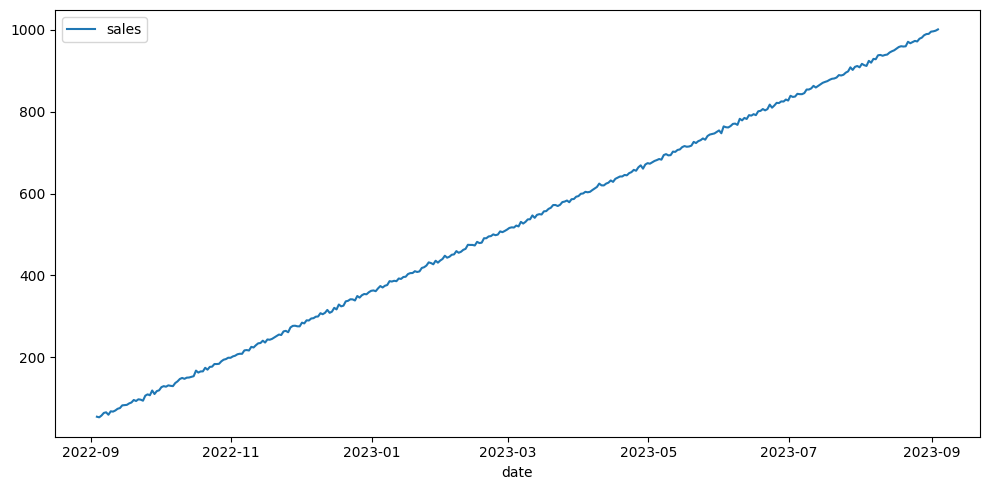

In [3]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

el tensor en esta serie temporal es el dia

la tendencia es ascendente

In [4]:
decomposition = seasonal_decompose(ts, period = 30)
decomposition

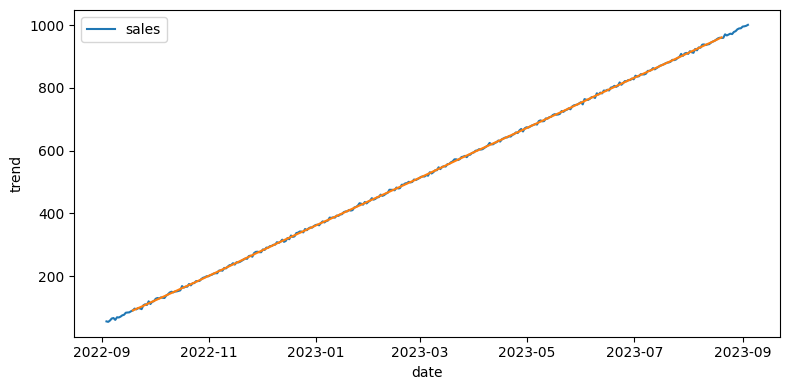

In [5]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

se ve claramente la tendencia ascendente

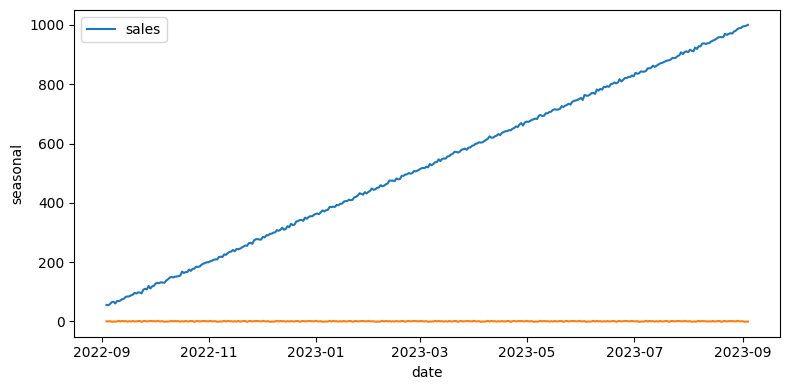

In [6]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) # Representa el número de pasajeros por mes
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [7]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [8]:
# miramos con "otra lupa"
# Diferenciar la serie para remover tendencia
ts2= df.set_index("date")


# Diferenciar la serie para remover tendencia
ts2['diff_sales'] = ts2['sales'].diff().dropna()
ts_dif=ts2['diff_sales']

ts_dif.dropna(inplace = True)

ts_dif

date
2022-09-04 17:10:08.079328   -1.488946
2022-09-05 17:10:08.079328    4.338482
2022-09-06 17:10:08.079328    6.389205
2022-09-07 17:10:08.079328    1.482734
2022-09-08 17:10:08.079328   -5.931768
                                ...   
2023-08-30 17:10:08.079328    0.518681
2023-08-31 17:10:08.079328    5.386972
2023-09-01 17:10:08.079328    0.827090
2023-09-02 17:10:08.079328    1.535798
2023-09-03 17:10:08.079328    3.132571
Name: diff_sales, Length: 365, dtype: float64